<a href="https://colab.research.google.com/github/D03S08/Portofolio-Data/blob/main/Customer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objektif Kasus
## a. Melihat pertumbuhan customer
- Bagaimana peningkatan jumlah customer selama tiga tahun terakhir
- Bagaimana persentase perbandingan pertumbuhan jumlah customer di tiap tahunnya
- Negara mana yang memiliki jumlah customer tertinggi ataupun terendah dalam 3 tahun dan pertahunnya
- Kota mana yang memiliki jumlah customer tertinggi dalam 3 tahun dan pertahunnya


## b.  Pembayaran mana yang digunakan oleh customer
- Apa tipe pembayaran yang sering dan jarang digunakan oleh customer
- Top 5 negara mana yang menggunakan pembayaran favorit
- Top 5 negara mana yang menggunakan pembayaran terjarang
- Berapa distribusi nilai transaksi dari setiap metode pembayaran

## c. Melihat kebiasaan pembelian customer
- Kapan waktu customer melakukan transaksi (hour, day, month)
- Seberapa lama jeda antara pembelian dan persetujuan
- Perbandingan rata-rata jeda pembayaran berdasarkan tipe *transaksi*

# Mengakses Dataset

In [48]:
# Mengimport library yang dibutuhkan untuk pengolahan data
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, sqlite3
from google.colab import drive
from IPython.display import Image

In [49]:
# Mengakses database pada drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


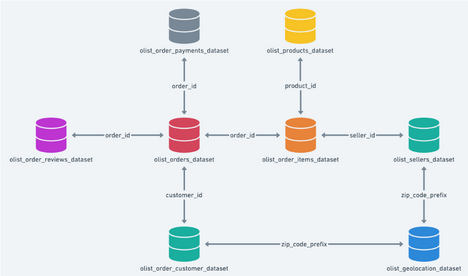

In [50]:
# Membuat koneksi ke database olist.db
con = sqlite3.connect("/content/drive/MyDrive/Pacmann (Analytics & Data Science)/Data Wrangling & SQL/olist.db")

# Menampilkan gambar relasi pada database olist
Image('/content/drive/MyDrive/Pacmann (Analytics & Data Science)/Data Wrangling & SQL/olist.png', width= "850")

In [51]:
# Membuat pemanggilan untuk tabel yang dibutuhkan
customer =  pd.read_sql("SELECT * FROM olist_order_customer_dataset", con)
order =  pd.read_sql("SELECT * FROM olist_order_dataset", con)
payment =  pd.read_sql("SELECT * FROM olist_order_payments_dataset", con)

In [52]:
# Memanggil tabel customer
customer.head()

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [53]:
# Memanggil tabel order
order.head()

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [54]:
# Memanggil tabel payment
payment.head()

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Untuk memenuhi objektif yang disebutkan, maka berikut adalah beberapa data yang dibutuhkan untuk proses analisa:
- **customer_state**: Negara tempat tinggal customer
- **order_purchase_timestamp**: Waktu customer melakukan pembelian
- **order_approved_at**: Waktu pembayaran customer disetujui
- **payment_type**: Tipe pembayaran yang dilakukan oleh customer
- **payment_value**: Besar nilai pembayaran
- **payment_installment**: Jumlah angsuran pembelian yang dilakukan customer

In [55]:
# Membuat query
query = """
SELECT 
  order_purchase_timestamp,
  order_approved_at,
  customer_state,
  customer_city,
  payment_type,
  payment_value,
  payment_installments
FROM (SELECT order_id, customer_state, customer_city, order_purchase_timestamp, order_approved_at
      FROM olist_order_customer_dataset
      JOIN olist_order_dataset
      ON olist_order_customer_dataset.customer_id = olist_order_dataset.customer_id) customer_order
JOIN olist_order_payments_dataset
  ON  customer_order.order_id = olist_order_payments_dataset.order_id
"""

# Mengakses data customer
dataset = pd.read_sql(query, con)
dataset.head()

,order_purchase_timestamp,order_approved_at,customer_state,customer_city,payment_type,payment_value,payment_installments
0,2017-05-16 15:05:35,2017-05-16 15:22:12,SP,franca,credit_card,146.87,2
1,2018-01-12 20:48:24,2018-01-12 20:58:32,SP,sao bernardo do campo,credit_card,335.48,8
2,2018-05-19 16:07:45,2018-05-20 16:19:10,SP,sao paulo,credit_card,157.73,7
3,2018-03-13 16:06:38,2018-03-13 17:29:19,SP,mogi das cruzes,credit_card,173.30,1
4,2018-07-29 09:51:30,2018-07-29 10:10:09,SP,campinas,credit_card,252.25,8


# Eksplorasi dan Pemrosesan Data

In [56]:
# Menampilkan 5 data teratas pada dataset
dataset.head()

,order_purchase_timestamp,order_approved_at,customer_state,customer_city,payment_type,payment_value,payment_installments
0,2017-05-16 15:05:35,2017-05-16 15:22:12,SP,franca,credit_card,146.87,2
1,2018-01-12 20:48:24,2018-01-12 20:58:32,SP,sao bernardo do campo,credit_card,335.48,8
2,2018-05-19 16:07:45,2018-05-20 16:19:10,SP,sao paulo,credit_card,157.73,7
3,2018-03-13 16:06:38,2018-03-13 17:29:19,SP,mogi das cruzes,credit_card,173.30,1
4,2018-07-29 09:51:30,2018-07-29 10:10:09,SP,campinas,credit_card,252.25,8


In [57]:
# Ekstrak ukuran data
nrows, ncols = dataset.shape

print(f"Data Input : ({nrows}, {ncols}) - (#jumlah observasi, #jumlah fitur)")

Data Input : (103886, 7) - (#jumlah observasi, #jumlah fitur)


In [58]:
# Cek informasi umum dari data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_purchase_timestamp  103886 non-null  object 
 1   order_approved_at         103711 non-null  object 
 2   customer_state            103886 non-null  object 
 3   customer_city             103886 non-null  object 
 4   payment_type              103886 non-null  object 
 5   payment_value             103886 non-null  float64
 6   payment_installments      103886 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 5.5+ MB


*Key Takeaways*
- Ada 103,886 observasi
- Data memiliki 7 fitur
- Tipe fitur bertipe object, float64 dan int64 namun terdapat fitur yaitu order_purchase_timestamp dan order_approved_at yang bertipe object dimana seharusnya bertipe datetime, makan diperlukan perbaikan terhadap masalah ini.

In [59]:
# Mengecek Missing Value
dataset.isnull().sum()

order_purchase_timestamp      0
order_approved_at           175
customer_state                0
customer_city                 0
payment_type                  0
payment_value                 0
payment_installments          0
dtype: int64

*Key Takeaways*
- Ada 1 dari 7 kolom yang memiliki missing value
- Untuk analisa data, missing value ini harus dibersihkan agar tidak mengganggu proses analisa.
  - Pada kasus ini missing value berada pada tanggal yang dimana cukup beresiko apabila dilakukan imputasi, maka dari itu missing value akan ditangani dengan cara di drop

In [60]:
# Handling Missing Value
dataset.dropna(axis=0, inplace=True)
dataset

,order_purchase_timestamp,order_approved_at,customer_state,customer_city,payment_type,payment_value,payment_installments
0,2017-05-16 15:05:35,2017-05-16 15:22:12,SP,franca,credit_card,146.87,2
1,2018-01-12 20:48:24,2018-01-12 20:58:32,SP,sao bernardo do campo,credit_card,335.48,8
2,2018-05-19 16:07:45,2018-05-20 16:19:10,SP,sao paulo,credit_card,157.73,7
3,2018-03-13 16:06:38,2018-03-13 17:29:19,SP,mogi das cruzes,credit_card,173.30,1
4,2018-07-29 09:51:30,2018-07-29 10:10:09,SP,campinas,credit_card,252.25,8
...,...,...,...,...,...,...,...
103881,2018-04-07 15:48:17,2018-04-07 16:08:45,SP,sao paulo,credit_card,88.78,6
103882,2018-04-04 08:20:22,2018-04-04 08:35:12,SP,taboao da serra,credit_card,129.06,3
103883,2018-04-08 20:11:50,2018-04-08 20:30:03,CE,fortaleza,credit_card,56.04,5
103884,2017-11-03 21:08:33,2017-11-03 21:31:20,RS,canoas,credit_card,711.07,2


In [61]:
# Mengecek kembali missing value
dataset.isnull().sum()

order_purchase_timestamp    0
order_approved_at           0
customer_state              0
customer_city               0
payment_type                0
payment_value               0
payment_installments        0
dtype: int64

Missing value telah berhasil ditangani, hal ini terlihat dari jumlah baris data yang berkurang dari 103,886 menjadi 103,711

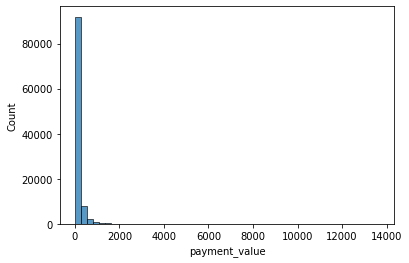

In [62]:
# Mengecek outlier dengan histogram
sns.histplot(data=dataset,x="payment_value", bins=50);

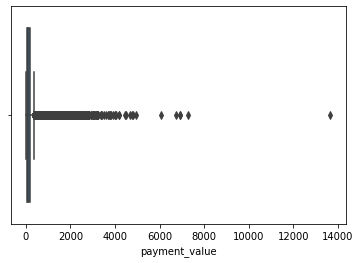

In [63]:
# Mengecek Outlier dengan boxplot
sns.boxplot(data=dataset,x="payment_value");

Dari hasil visualisasi diatas, terdapat outlier pada kolom payment value. Namun karena outlier adalah hasil observasi yang benar maka agar tidak terlalu merubah data, akan dilakukan handling outlier dengan metode capping

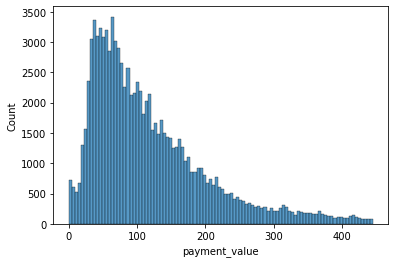

In [64]:
# Handling Outlier
# batas atas data
batas_atas = dataset["payment_value"].quantile(q=0.9) * 1.5

# plot tanpa outlier
dataset_without_outlier = dataset[dataset["payment_value"] < batas_atas]

# plot kolom SQ_FT tanpa extreme outlier
sns.histplot(dataset_without_outlier["payment_value"]);

In [65]:
# Mengecek data duplikat
dataset_without_outlier[dataset_without_outlier.duplicated(keep=False)]

,order_purchase_timestamp,order_approved_at,customer_state,customer_city,payment_type,payment_value,payment_installments
312,2017-11-26 15:11:19,2017-11-26 15:17:28,SP,sao paulo,voucher,189.88,1
313,2017-11-26 15:11:19,2017-11-26 15:17:28,SP,sao paulo,voucher,189.88,1
539,2018-04-04 19:21:32,2018-04-04 19:35:19,MS,rio brilhante,voucher,20.00,1
540,2018-04-04 19:21:32,2018-04-04 19:35:19,MS,rio brilhante,voucher,20.00,1
541,2018-04-04 19:21:32,2018-04-04 19:35:19,MS,rio brilhante,voucher,20.00,1
...,...,...,...,...,...,...,...
103659,2017-09-05 09:29:17,2017-09-06 19:43:28,SP,jundiai,voucher,83.59,1
103660,2017-09-05 09:29:17,2017-09-06 19:43:28,SP,jundiai,voucher,83.59,1
103661,2017-09-05 09:29:17,2017-09-06 19:43:28,SP,jundiai,voucher,83.59,1
103789,2017-07-12 15:40:39,2017-07-12 15:55:10,SP,caraguatatuba,voucher,7.30,1


In [66]:
# Handling data duplikat
dataset_clean = dataset_without_outlier.drop_duplicates(keep='first')
dataset_clean

,order_purchase_timestamp,order_approved_at,customer_state,customer_city,payment_type,payment_value,payment_installments
0,2017-05-16 15:05:35,2017-05-16 15:22:12,SP,franca,credit_card,146.87,2
1,2018-01-12 20:48:24,2018-01-12 20:58:32,SP,sao bernardo do campo,credit_card,335.48,8
2,2018-05-19 16:07:45,2018-05-20 16:19:10,SP,sao paulo,credit_card,157.73,7
3,2018-03-13 16:06:38,2018-03-13 17:29:19,SP,mogi das cruzes,credit_card,173.30,1
4,2018-07-29 09:51:30,2018-07-29 10:10:09,SP,campinas,credit_card,252.25,8
...,...,...,...,...,...,...,...
103880,2017-12-17 23:13:41,2017-12-18 00:17:27,MG,divinopolis,credit_card,75.88,1
103881,2018-04-07 15:48:17,2018-04-07 16:08:45,SP,sao paulo,credit_card,88.78,6
103882,2018-04-04 08:20:22,2018-04-04 08:35:12,SP,taboao da serra,credit_card,129.06,3
103883,2018-04-08 20:11:50,2018-04-08 20:30:03,CE,fortaleza,credit_card,56.04,5


In [67]:
# Mengubah tipe data object pada waktu menjadi datetime
dataset_clean['order_purchase_timestamp'] = pd.to_datetime(dataset_clean['order_purchase_timestamp'], dayfirst=True) 
dataset_clean['order_approved_at'] = pd.to_datetime(dataset_clean['order_approved_at'], dayfirst=True) 

<ipython-input-67-ce7c136342da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean['order_purchase_timestamp'] = pd.to_datetime(dataset_clean['order_purchase_timestamp'], dayfirst=True)
<ipython-input-67-ce7c136342da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean['order_approved_at'] = pd.to_datetime(dataset_clean['order_approved_at'], dayfirst=True)


In [68]:
# Mengecek kembali tipe data
dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98062 entries, 0 to 103885
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_purchase_timestamp  98062 non-null  datetime64[ns]
 1   order_approved_at         98062 non-null  datetime64[ns]
 2   customer_state            98062 non-null  object        
 3   customer_city             98062 non-null  object        
 4   payment_type              98062 non-null  object        
 5   payment_value             98062 non-null  float64       
 6   payment_installments      98062 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 6.0+ MB


In [69]:
# Membuat dataframe baru untuk melihat pertumbuhan customer
jumlah_customer = pd.DataFrame({'2016' : dataset_clean[dataset_clean['order_purchase_timestamp'] < '2017-01-01'].count(),
                                '2017' : dataset_clean[dataset_clean['order_purchase_timestamp'] < '2018-01-01'].count(),
                                '2018' : dataset_clean[dataset_clean['order_purchase_timestamp'] >= '2018-01-01'].count()
})

jumlah_customer = pd.DataFrame(jumlah_customer.iloc[0,:])
jumlah_customer

,order_purchase_timestamp
2016,311
2017,45165
2018,52897


In [70]:
# Membuat kolom baru 
dataset_clean['tahun'] = dataset_clean['order_purchase_timestamp'].dt.strftime('%Y') # Membuat kolom Tahun 
dataset_clean['bulan'] = dataset_clean['order_purchase_timestamp'].dt.strftime('%m') # Membuat kolom Bulan
dataset_clean['hari'] = dataset_clean['order_purchase_timestamp'].dt.strftime('%d') # Membuat kolom Hari
dataset_clean['jam'] = dataset_clean['order_purchase_timestamp'].dt.strftime('%H') # Membuat kolom Jam

# Melihat data
dataset_clean.head()

<ipython-input-70-17a2aeef3345>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean['tahun'] = dataset_clean['order_purchase_timestamp'].dt.strftime('%Y') # Membuat kolom Tahun
<ipython-input-70-17a2aeef3345>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean['bulan'] = dataset_clean['order_purchase_timestamp'].dt.strftime('%m') # Membuat kolom Bulan
<ipython-input-70-17a2aeef3345>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

,order_purchase_timestamp,order_approved_at,customer_state,customer_city,payment_type,payment_value,payment_installments,tahun,bulan,hari,jam
0,2017-05-16 15:05:35,2017-05-16 15:22:12,SP,franca,credit_card,146.87,2,2017,05,16,15
1,2018-01-12 20:48:24,2018-01-12 20:58:32,SP,sao bernardo do campo,credit_card,335.48,8,2018,01,12,20
2,2018-05-19 16:07:45,2018-05-20 16:19:10,SP,sao paulo,credit_card,157.73,7,2018,05,19,16
3,2018-03-13 16:06:38,2018-03-13 17:29:19,SP,mogi das cruzes,credit_card,173.30,1,2018,03,13,16
4,2018-07-29 09:51:30,2018-07-29 10:10:09,SP,campinas,credit_card,252.25,8,2018,07,29,09


In [71]:
# Membuat beberapa variabel untuk analisa data
customer_tertinggi = dataset_clean.groupby(['tahun','customer_state'])['order_purchase_timestamp'].count().reset_index() # Melakukan groupby pada dataset berdasarkan tahun dan customer_state
customer_tertinggi = customer_tertinggi.rename(columns = {'order_purchase_timestamp':'jumlah_customer'}) # Mengubah nama kolom order_purchase_timestamp menjadi jumlah_customer
cust_2016 = customer_tertinggi[customer_tertinggi['tahun']=='2016'].sort_values('jumlah_customer', ascending=False) # Melakukan filtering terhadap data customer dengan tahun 2016
cust_2017 = customer_tertinggi[customer_tertinggi['tahun']=='2017'].sort_values('jumlah_customer', ascending=False) # Melakukan filtering terhadap data customer dengan tahun 2017
cust_2018 = customer_tertinggi[customer_tertinggi['tahun']=='2018'].sort_values('jumlah_customer', ascending=False) # Melakukan filtering terhadap data customer dengan tahun 2018

customer_tertinggi2 = dataset_clean.groupby(['tahun','customer_city'])['order_purchase_timestamp'].count().reset_index() # Melakukan groupby pada dataset berdasarkan tahun dan customer_city
customer_tertinggi2 = customer_tertinggi2.rename(columns = {'order_purchase_timestamp':'jumlah_customer'}) # Mengubah nama kolom order_purchase_timestamp menjadi jumlah_customer
cust2_2016 = customer_tertinggi2[customer_tertinggi2['tahun']=='2016'].sort_values('jumlah_customer', ascending=False) # Melakukan filtering terhadap data customer dengan tahun 2016
cust2_2017 = customer_tertinggi2[customer_tertinggi2['tahun']=='2017'].sort_values('jumlah_customer', ascending=False) # Melakukan filtering terhadap data customer dengan tahun 2017
cust2_2018 = customer_tertinggi2[customer_tertinggi2['tahun']=='2018'].sort_values('jumlah_customer', ascending=False) # Melakukan filtering terhadap data customer dengan tahun 2018

credit = dataset_clean[dataset_clean['payment_type']=='credit_card'] # Melakukan filtering terhadap tipe pembayaran credit card
debit = dataset_clean[dataset_clean['payment_type']=='debit_card'] # Melakukan filtering terhadap tipe pembayaran debit card
boleto = dataset_clean[dataset_clean['payment_type']=='boleto'] # Melakukan filtering terhadap tipe pembayaran boleto
voucher = dataset_clean[dataset_clean['payment_type']=='voucher'] # Melakukan filtering terhadap tipe pembayaran voucher

jam = dataset_clean.pivot_table(values="customer_state", index=["jam"], columns=["tahun"],aggfunc='count', fill_value=0) # Membuat vipot table untuk jam
hari = dataset_clean.pivot_table(values="customer_state", index=["hari"], columns=["tahun"],aggfunc='count', fill_value=0) # Membuat vipot table untuk hari
bulan = dataset_clean.pivot_table(values="customer_state", index=["bulan"], columns=["tahun"],aggfunc='count', fill_value=0) # Membuat vipot table untuk bulan

# Analisa Data


## Melihat pertumbuhan customer
### 1. Bagaimana peningkatan jumlah customer selama tiga tahun terakhir



      order_purchase_timestamp
2016                       311
2017                     45165
2018                     52897


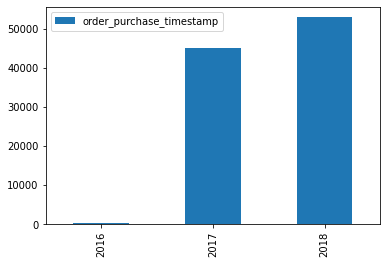

In [72]:
# Melakukan visualisasi barplot
jumlah_customer.plot(kind='bar');

# Mencetak keluaran nilai
print(jumlah_customer)

### 2. Bagaimana persentase perbandingan pertumbuhan jumlah customer di tiap tahunnya

In [73]:
def persentase_pertumbuhan():
  """
  Fungsi ini bertujuan untuk menghitung berapa persentase pertumbuhan
  customer dari tahun ke tahunnya selama 3 tahun.
  """

  # Mendeklarasikan jumlah customer per tahun
  pertumbuhan_2016 = 311
  pertumbuhan_2017 = 45165
  pertumbuhan_2018 = 52897

  # Menghitung persentase pertumbuhan customer tahun 2016 dan 2017
  persentase_2016_2017 = np.round(((pertumbuhan_2017-pertumbuhan_2016)/pertumbuhan_2017)*100, 2)
  print(f'Persentase pertumbuhan customer tahun 2016 ke 2017 adalah {persentase_2016_2017}%')

  # Menghitung persentase pertumbuhan customer tahun 2017 dan 2018
  persentase_2017_2018 = np.round(((pertumbuhan_2018-pertumbuhan_2017)/pertumbuhan_2018)*100,2)
  print(f'Persentase pertumbuhan customer tahun 2017 ke 2018 adalah {persentase_2017_2018}%')

# Memanggil fungsi
persentase_pertumbuhan()

Persentase pertumbuhan customer tahun 2016 ke 2017 adalah 99.31%
Persentase pertumbuhan customer tahun 2017 ke 2018 adalah 14.62%


### 3. Negara mana yang memiliki jumlah customer tertinggi ataupun terendah dalam 3 tahun dan pertahunnya

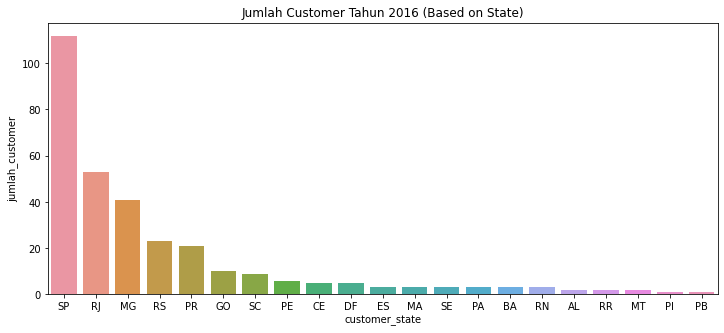

   customer_state  jumlah_customer
0              SP              112
1              RJ               53
2              MG               41
3              RS               23
4              PR               21
5              GO               10
6              SC                9
7              PE                6
8              CE                5
9              DF                5
10             ES                3
11             MA                3
12             SE                3
13             PA                3
14             BA                3
15             RN                3
16             AL                2
17             RR                2
18             MT                2
19             PI                1
20             PB                1


In [74]:
# Menetapkan figure
plt.figure(figsize=(12,5))

# Visualisasi barplot
sns.barplot(data=cust_2016, 
            x='customer_state', 
            y='jumlah_customer')

# Menambahkan judul
plt.title('Jumlah Customer Tahun 2016 (Based on State)')

# Memanggil visualisasi
plt.show()

# Mencetak nilai
print(cust_2016[['customer_state','jumlah_customer']].reset_index(drop=True))

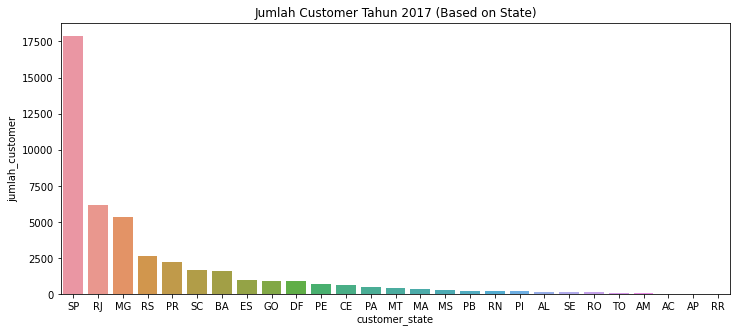

   customer_state  jumlah_customer
0              SP            17907
1              RJ             6199
2              MG             5388
3              RS             2627
4              PR             2238
5              SC             1686
6              BA             1584
7              ES              972
8              GO              930
9              DF              904
10             PE              749
11             CE              630
12             PA              480
13             MT              410
14             MA              366
15             MS              292
16             PB              240
17             RN              233
18             PI              222
19             AL              191
20             SE              176
21             RO              133
22             TO              129
23             AM               73
24             AC               49
25             AP               28
26             RR               18


In [75]:
# Menetapkan Figure
plt.figure(figsize=(12,5))

# Visualisasi barplot
sns.barplot(data=cust_2017, 
            x='customer_state', 
            y='jumlah_customer')

# Menambahkan judul
plt.title('Jumlah Customer Tahun 2017 (Based on State)')

# Memanggil visualisasi
plt.show()

# Mencetak nilai
print(cust_2017[['customer_state','jumlah_customer']].reset_index(drop=True))

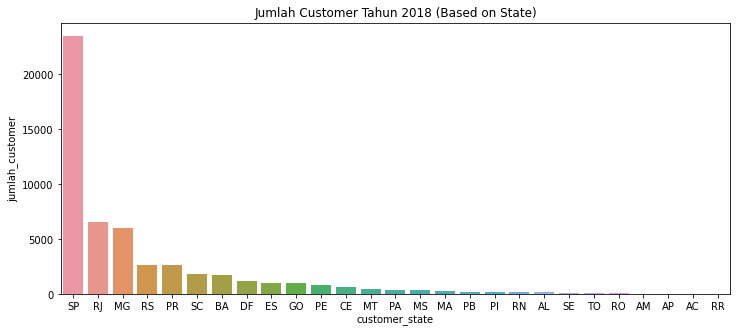

   customer_state  jumlah_customer
0              SP            23503
1              RJ             6535
2              MG             6046
3              RS             2712
4              PR             2706
5              SC             1845
6              BA             1753
7              DF             1171
8              ES             1040
9              GO             1028
10             PE              836
11             CE              633
12             MT              459
13             PA              431
14             MS              402
15             MA              338
16             PB              252
17             PI              250
18             RN              231
19             AL              188
20             SE              148
21             TO              138
22             RO              105
23             AM               68
24             AP               36
25             AC               23
26             RR               20


In [76]:
# Menetapkan figure
plt.figure(figsize=(12,5))

# Visualisasi barplot
sns.barplot(data=cust_2018, 
            x='customer_state', 
            y='jumlah_customer')

# Menambahkan judul
plt.title('Jumlah Customer Tahun 2018 (Based on State)')

# Memanggil visualisasi
plt.show()

# Mencetak nilai
print(cust_2018[['customer_state','jumlah_customer']].reset_index(drop=True))

### 4. Kota mana yang memiliki jumlah customer tertinggi dalam 3 tahun dan pertahunnya

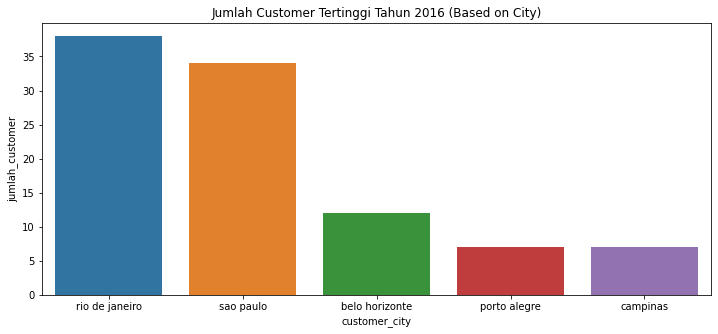

    customer_city  jumlah_customer
0  rio de janeiro               38
1       sao paulo               34
2  belo horizonte               12
3    porto alegre                7
4        campinas                7


In [77]:
# Menetapkan figure
plt.figure(figsize=(12,5))

# visualisasi barplot
sns.barplot(data=cust2_2016.head(), 
            x='customer_city', 
            y='jumlah_customer')

# Menambahkan judul
plt.title('Jumlah Customer Tertinggi Tahun 2016 (Based on City)')

# Memanggil visualisasi
plt.show()

# Mencetak nilai
print(cust2_2016[['customer_city','jumlah_customer']].head().reset_index(drop=True))

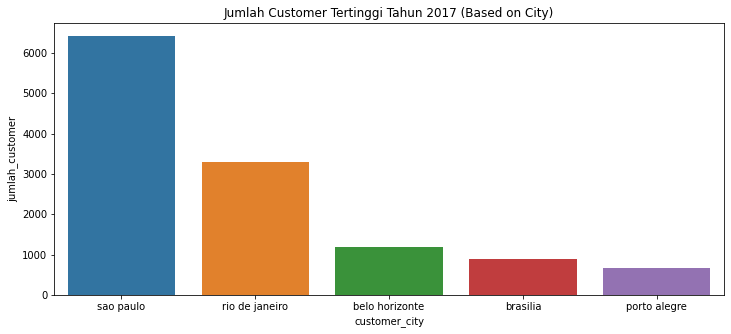

    customer_city  jumlah_customer
0       sao paulo             6417
1  rio de janeiro             3303
2  belo horizonte             1195
3        brasilia              893
4    porto alegre              675


In [78]:
# Menetapkan figure
plt.figure(figsize=(12,5))

# Visualisasi barplot
sns.barplot(data=cust2_2017.head(), 
            x='customer_city', 
            y='jumlah_customer')

# Menambahkan judul
plt.title('Jumlah Customer Tertinggi Tahun 2017 (Based on City)')

# Memanggil visualisasi
plt.show()

# Mencetak nilai
print(cust2_2017[['customer_city','jumlah_customer']].head().reset_index(drop=True))

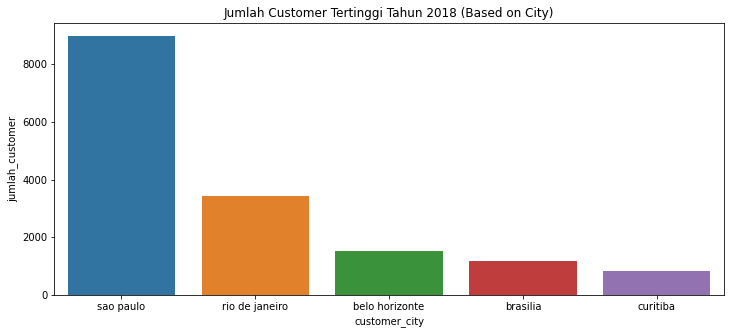

    customer_city  jumlah_customer
0       sao paulo             8978
1  rio de janeiro             3443
2  belo horizonte             1529
3        brasilia             1171
4        curitiba              839


In [79]:
# Menetapkan figure
plt.figure(figsize=(12,5))

# Visualisasi barplot
sns.barplot(data=cust2_2018.head(), 
            x='customer_city', 
            y='jumlah_customer')

# Menambahkan judul
plt.title('Jumlah Customer Tertinggi Tahun 2018 (Based on City)')

# Memanggil visualisasi
plt.show()

# Mencetak nilai
print(cust2_2018[['customer_city','jumlah_customer']].head().reset_index(drop=True))

## Pembayaran mana yang digunakan oleh customer
### 1. Apa tipe pembayaran yang sering dan jarang digunakan oleh customer

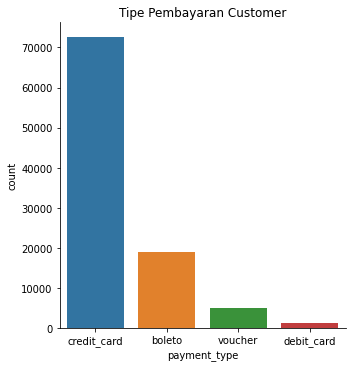

In [80]:
# Menetapkan urutan data kategorik
category_order = ['credit_card', 'boleto', 'voucher', 'debit_card']

# Melakukan visualisasi countplot
sns.catplot(x='payment_type', data=dataset_clean, kind='count', order=category_order)

# Menambahkan judul
plt.title('Tipe Pembayaran Customer');

### 2. Negara dengan pembayaran credit card teratas


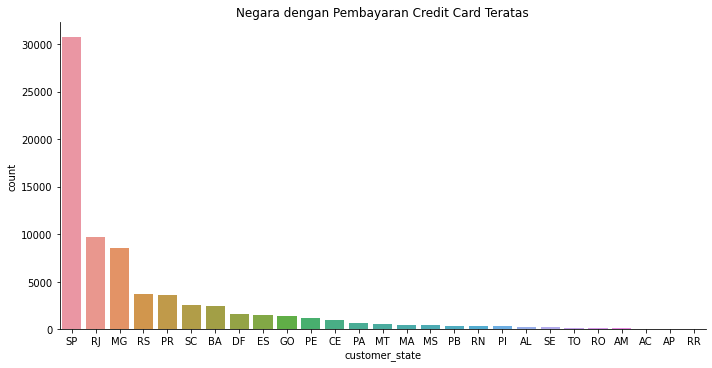

In [81]:
# Melakukan visualisasi countplot
sns.catplot(x='customer_state', data=credit, kind='count', order=credit['customer_state'].value_counts().index, aspect=2 )

# Menambahkan judul
plt.title('Negara dengan Pembayaran Credit Card Teratas');

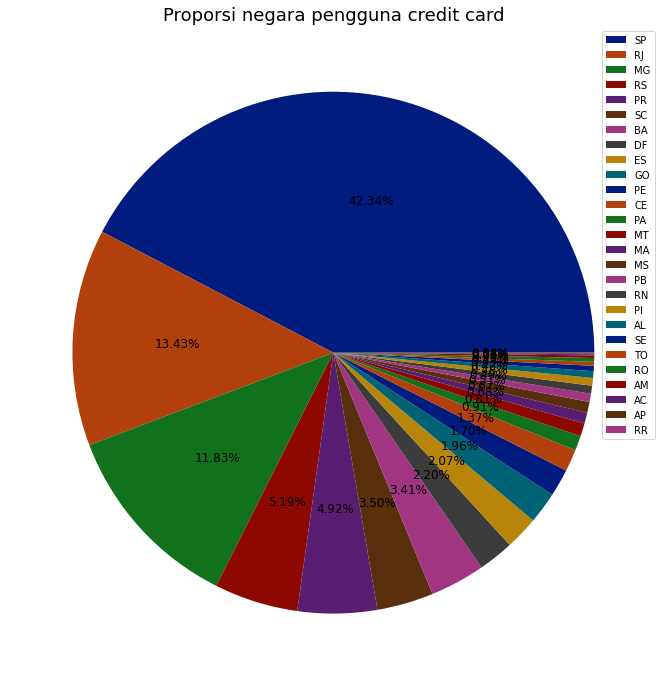

In [82]:
# Menetapkan figure
plt.figure(figsize=(12,12))

# Mendeklarasikan data dan keys
data = credit['customer_state'].value_counts()/len(credit['customer_state'])
keys = credit['customer_state'].value_counts().index

# Menetapkan warna palette
palette_color = sns.color_palette('dark')

# Menambahkan judul
plt.title('Proporsi negara pengguna credit card', fontsize=18)

# Visualisasi pie chart
plt.pie(data, colors=palette_color,
         autopct='%.2f%%', textprops={'fontsize': 12})

# Menambahkan legend
plt.legend(labels=keys);

### 3. Negara dengan pembayaran debit card teratas


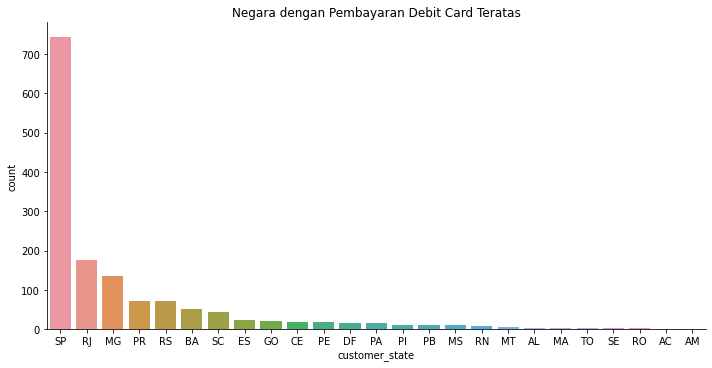

In [83]:
# Melakukan visualisasi countplot
sns.catplot(x='customer_state', data=debit, kind='count', order=debit['customer_state'].value_counts().index, aspect=2 )

# Menambahkan judul
plt.title('Negara dengan Pembayaran Debit Card Teratas');

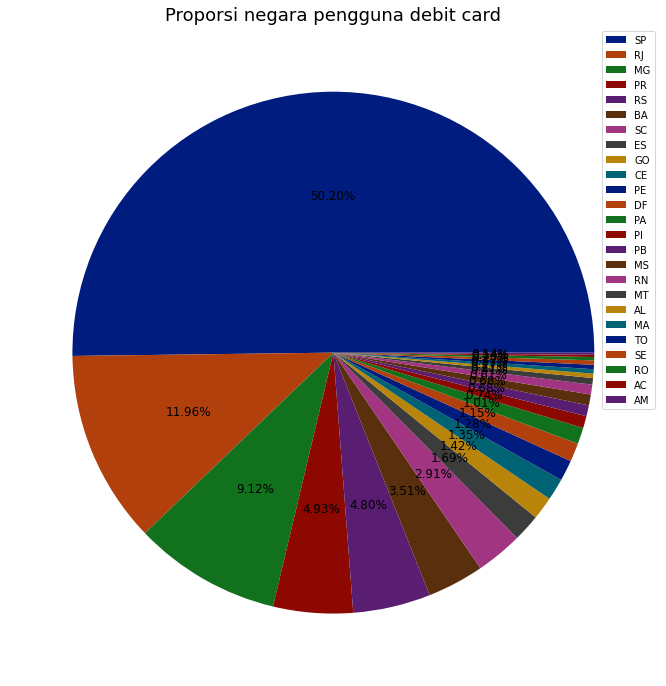

In [84]:
# Menetapkan figure
plt.figure(figsize=(12,12))

# Mendeklarasikan data dan keys
data = debit['customer_state'].value_counts()/len(debit['customer_state'])
keys = debit['customer_state'].value_counts().index

# Mengatur warna palette
palette_color = sns.color_palette('dark')

# Menambahkan judul
plt.title('Proporsi negara pengguna debit card', fontsize=18)

# Visualisasi pie chart
plt.pie(data, colors=palette_color,
         autopct='%.2f%%', textprops={'fontsize': 12})

# Menambahkan legend
plt.legend(labels=keys);

### 4. Berapa distribusi nilai transaksi dari setiap metode pembayaran


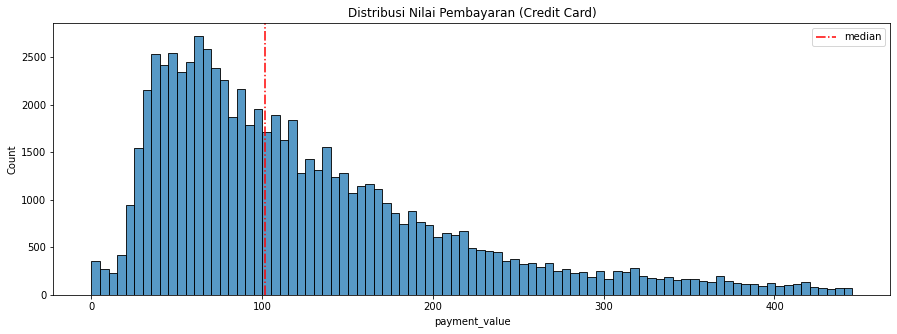

Median: 101.34


In [85]:
# Menetapkan figure
plt.figure(figsize=(15,5))
sns.histplot(data=credit, x="payment_value")

# gambarkan garis vertikal
plt.axvline(credit["payment_value"].median(), color="r", linestyle="dashdot", label="median")
plt.title('Distribusi Nilai Pembayaran (Credit Card)')
plt.legend()

# tampilkan plot
plt.show()

# Menampilkan nilai Median
print('Median:', credit["payment_value"].median())

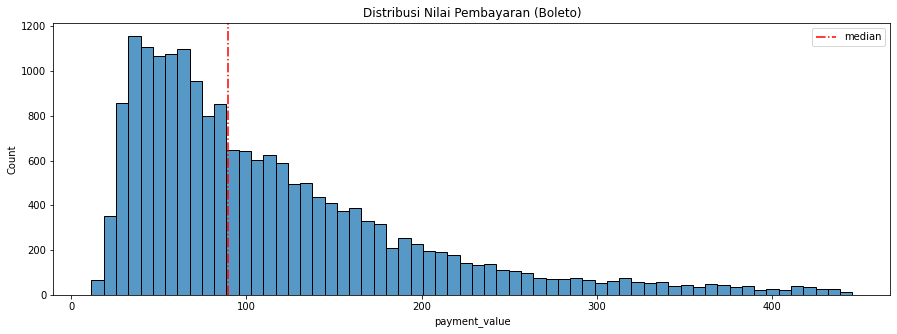

Median: 89.555


In [86]:
# Menetapkan figure
plt.figure(figsize=(15,5))
sns.histplot(data=boleto, x="payment_value")

# gambarkan garis vertikal
plt.axvline(boleto["payment_value"].median(), color="r", linestyle="dashdot", label="median")
plt.title('Distribusi Nilai Pembayaran (Boleto)')
plt.legend()

# tampilkan plot
plt.show()

# Menampilkan nilai Median
print('Median:', boleto["payment_value"].median())

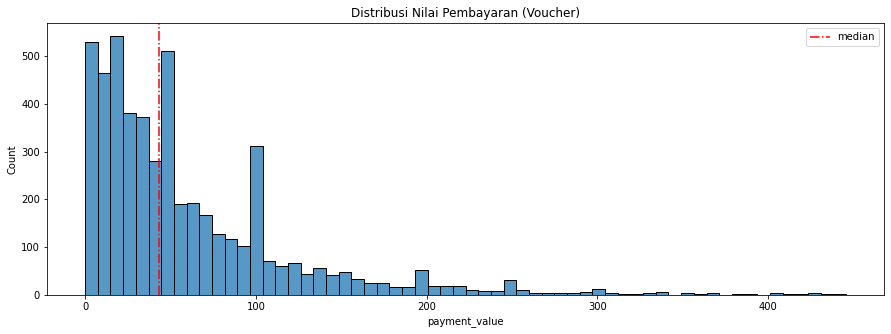

Median: 43.545


In [87]:
# Menetapkan figure
plt.figure(figsize=(15,5))
sns.histplot(data=voucher, x="payment_value")

# gambarkan garis vertikal
plt.axvline(voucher["payment_value"].median(), color="r", linestyle="dashdot", label="median")
plt.title('Distribusi Nilai Pembayaran (Voucher)')
plt.legend()

# tampilkan plot
plt.show()

# Menampilkan nilai Median
print('Median:', voucher["payment_value"].median())

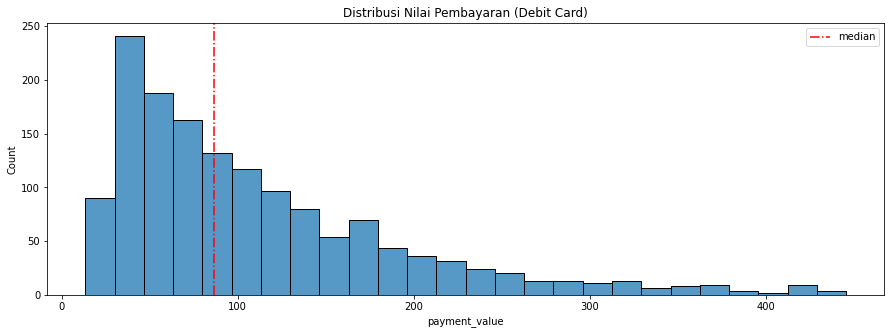

Median: 86.51


In [88]:
# Menetapkan figure
plt.figure(figsize=(15,5))
sns.histplot(data=debit, x="payment_value")

# gambarkan garis vertikal
plt.axvline(debit["payment_value"].median(), color="r", linestyle="dashdot", label="median")
plt.title('Distribusi Nilai Pembayaran (Debit Card)')
plt.legend()

# tampilkan plot
plt.show()

# Menampilkan nilai Median
print('Median:', debit["payment_value"].median())

## Melihat kebiasaan pembelian customer
### 1. Kapan waktu customer melakukan transaksi (hour, day, month)


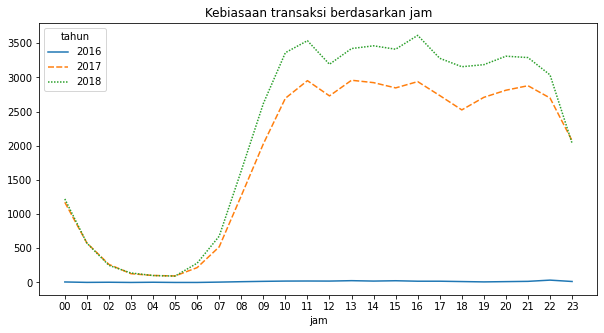

In [89]:
# Visualisasi lineplot
plt.figure(figsize=(10,5))
sns.lineplot(data=jam)

# Menambahkan judul
plt.title('Kebiasaan transaksi berdasarkan jam');

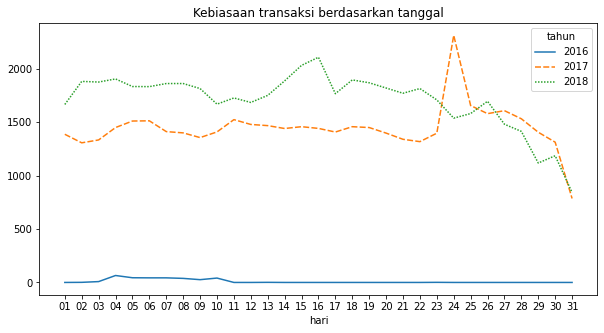

In [90]:
# Menetapkan figure
plt.figure(figsize=(10,5)) 

# visualisasi lineplot
sns.lineplot(data=hari) 

# Menambahkan judul
plt.title('Kebiasaan transaksi berdasarkan tanggal'); 

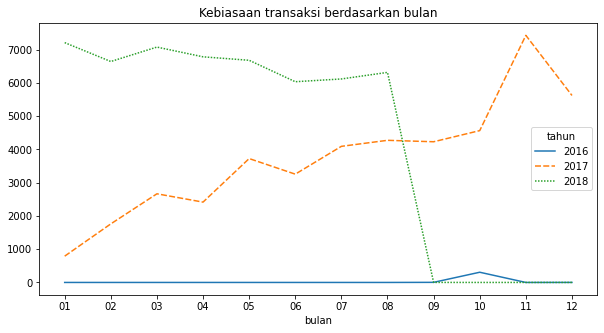

In [91]:
# Menetapkan figure
plt.figure(figsize=(10,5))

# Visualisasi lineplot
sns.lineplot(data=bulan)

# Menambahkan judul
plt.title('Kebiasaan transaksi berdasarkan bulan');

### 2. Seberapa lama jeda antara pembelian dan persetujuan

In [92]:
# Menghitung selisih waktu
dataset_clean['selisih_waktu'] = dataset_clean['order_approved_at']-dataset_clean['order_purchase_timestamp']

# Menghitung rata-rata selisih waktu
dataset_clean['selisih_waktu'].mean()

<ipython-input-92-760c023257cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean['selisih_waktu'] = dataset_clean['order_approved_at']-dataset_clean['order_purchase_timestamp']


Timedelta('0 days 10:13:40.009147274')


### 3. Perbandingan rata-rata jeda pembayaran berdasarkan tipe *transaksi*

In [93]:
# Mencetak rata-rata jeda pembayaran berdasarkan tipe transaksi
print('rata-rata jeda kartu kredit: ', dataset_clean.selisih_waktu[dataset_clean['payment_type']=='credit_card'].mean(),
      '\nrata-rata jeda boleto: ', dataset_clean.selisih_waktu[dataset_clean['payment_type']=='boleto'].mean(),
      '\nrata-rata jeda voucher: ', dataset_clean.selisih_waktu[dataset_clean['payment_type']=='voucher'].mean(),
      '\nrata-rata jeda kartu debit: ', dataset_clean.selisih_waktu[dataset_clean['payment_type']=='debit_card'].mean()
)

rata-rata jeda kartu kredit:  0 days 04:21:39.043577096 
rata-rata jeda boleto:  1 days 09:09:48.133720316 
rata-rata jeda voucher:  0 days 08:42:01.620245641 
rata-rata jeda kartu debit:  0 days 09:30:07.895270270
